# Students Performance in Exams Report Analysis

How students perform academically usually reflects not just themselves individually but the resources provided for them. Given that everyone is unique in their own personal interest, economical background, and social abilities results to the outcome of a variety of different test scores across different subjects. The data we will be exploring today consist of 1,000 students and their exam scores in the three subjects: math, reading, and writing. Many of the 1,000 students come from different genders, race, and parental educational background. The focus of this report will be to come up with possible questions and/or ideas associated with the student's exam scores, possibly answering questions that was inquired early on.

This report will analyze and possibly answer these following questions:

- Does a parent's education reflect upon their child's academics?
- Can economic background tell us anything ?
- How can we go about improving one's exam scores based on the data given?


### Reading Data with Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
students_data = pd.read_csv('C:/Users/Yosua/Downloads/StudentsPerformance.csv')
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
students_data.shape # 100 rows

(1000, 8)

In [6]:
students_data.info() # no null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We will add another column called total score which is the combined score of all three subjects as it will be one of the main focuses for this report.

In [7]:
students_data['total score'] = students_data['math score'] + students_data['reading score'] + students_data['writing score']

In [8]:
students_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


From here on we will use `students_data` as the main dataframe.

### Does a parent's education reflect upon their child's academics?

By taking the data of all unique parent's education levels and the average of their child's exam scores, we will be able to determine if their level of education reveals any possible trends or significant impact towards academic results.

In [9]:
x = students_data.groupby('parental level of education').agg('mean')
x

,math score,reading score,writing score,total score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


In [10]:
x_axis = ['hs', 'some_hs', 'some_college', 'associate', 'bachelor', 'masters']

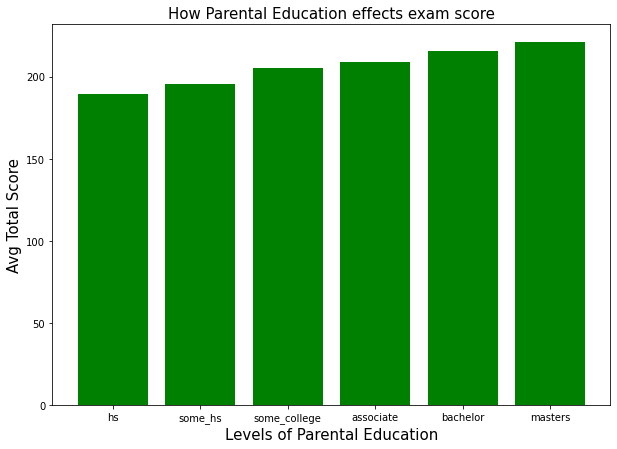

In [11]:
plt.figure(figsize=(10,7))
plt.bar(x_axis, x['total score'].sort_values(), color = 'green')

plt.ylabel('Avg Total Score', fontsize = '15')
plt.xlabel('Levels of Parental Education', fontsize = '15')
plt.title('How Parental Education effects exam score', fontsize = '15')
plt.show()

The bar graph above is the result of after sorting the mean of the scores grouped by the parental levels of education. As shown, the more educated the parent is the higher their students tend to score in their exams. The average score of students who's parents only finished school up to high school is around 189 whereas the average score of students who's parents have a masters degree is well above 200 at around 220. Therefore, we can conclude that the parent's education does indeed have an impact towards their child's academics.

However, we still lack evidence to assume that the reason why exam scores tend to be higher is solely due to a heirarchy of parental education. What could further support our answer? For one, we can look profoundly into some possible __economic factors.__ 

### Do Economic factors come into play?
For the most part, financial aid is given to families dealing with financial problems and in need of financial support.
The dataset includes whether students receive financial aid to help pay for their school lunch under the `lunch` column which includes two types of fee status:  
1. Standard
2. Free/reduced

So does this tell us whether a student's financial background could possibly affect their exam scores?
<br>
From here conduct a visual analysis comparing exam scores of those with standard lunch price vs free/reduced lunch price.

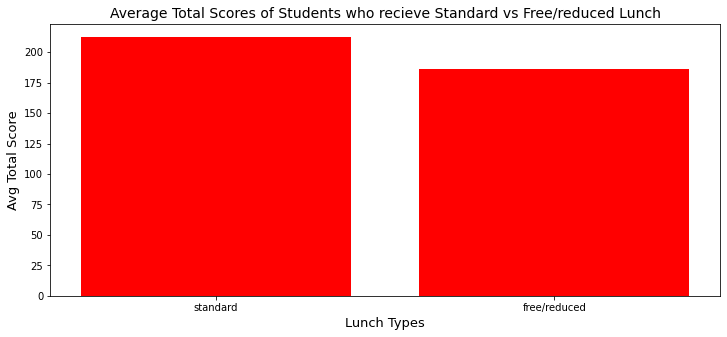

In [12]:
lunch_types = ['standard', 'free/reduced']
l_scores = [students_data[students_data['lunch'] == 'standard']['total score'].mean(),
            students_data[students_data['lunch'] == 'free/reduced']['total score'].mean()]

plt.figure(figsize=(12,5))
plt.bar(lunch_types, l_scores, color = 'red')
plt.ylabel('Avg Total Score', fontsize = 13)
plt.xlabel('Lunch Types', fontsize = 13)
plt.title('Average Total Scores of Students who recieve Standard vs Free/reduced Lunch', fontsize = 14)
plt.show()

Students who recieve free or reduced lunch averaged lower test scores than those who pay the standard lunch price. This is also true based off the same groups within every student's parental level of education.

In [13]:
data = students_data.groupby(['parental level of education', 'lunch']).agg('mean')
data

math score  reading score  \
parental level of education lunch                                     
associate's degree          free/reduced   62.610390      67.649351   
                            standard       70.682759      72.668966   
bachelor's degree           free/reduced   63.000000      68.931818   
                            standard       73.189189      75.418919   
high school                 free/reduced   54.514286      60.214286   
                            standard       66.373016      67.198413   
master's degree             free/reduced   61.166667      70.291667   
                            standard       75.628571      78.857143   
some college                free/reduced   60.126582      65.075949   
                            standard       70.891156      71.816327   
some high school            free/reduced   53.934426      60.114754   
                            standard       68.440678      70.466102   

                                          writing score  total score  
parental level of education lunch                                     
associate's degree          free/reduced      66.025974   196.285714  
                            standard          71.951724   215.303448  
bachelor's degree           free/reduced      69.227273   201.159091  
                            standard          75.851351   224.459459  
high school                 free/reduced      57.400000   172.128571  
                            standard          65.253968   198.825397  
master's degree             free/reduced      69.875000   201.333333  
                            standard          79.657143   234.142857  
some college                free/reduced      63.708861   188.911392  
                            standard          71.598639   214.306122  
some high school            free/reduced      57.622951   171.672131  
                            standard          68.644068   207.550847


Financial aid is usually given to families with financial problems and in need of financial support. Although not always true, parents who are more well educated bring home higher income. Therefore, certain families would recieve the standard lunch fee whereas other families would recieve a free/reduced lunch fee. To determine if this applies to our data we need to analyze whether it is true that the higher the parental level of education, the lower the percentage of receiving free/reduced lunch fees.

In [14]:
lunch_count = students_data.groupby(['parental level of education', 'lunch'], as_index=False).size()
L = lunch_count.rename(columns = {0: 'count'})
Lunch_count = L.set_index('parental level of education')
Lunch_count

lunch_num = students_data['parental level of education'].value_counts()

Lunch_count['percentage'] = [(Lunch_count.loc["associate's degree", 'size'] / lunch_num["associate's degree"]).iloc[0] * 100,
                             (Lunch_count.loc["associate's degree", 'size'] / lunch_num["associate's degree"]).iloc[1] * 100,
                             (Lunch_count.loc["bachelor's degree", 'size'] / lunch_num["bachelor's degree"]).iloc[0] * 100,
                             (Lunch_count.loc["bachelor's degree", 'size'] / lunch_num["bachelor's degree"]).iloc[1] * 100,
                             (Lunch_count.loc["high school", 'size'] / lunch_num["high school"]).iloc[0] * 100,
                             (Lunch_count.loc["high school", 'size'] / lunch_num["high school"]).iloc[1] * 100,
                             (Lunch_count.loc["master's degree", 'size'] / lunch_num["master's degree"]).iloc[0] * 100,
                             (Lunch_count.loc["master's degree", 'size'] / lunch_num["master's degree"]).iloc[1] * 100,
                             (Lunch_count.loc["some college", 'size'] / lunch_num["some college"]).iloc[0] * 100,
                             (Lunch_count.loc["some college", 'size'] / lunch_num["some college"]).iloc[1] * 100,
                             (Lunch_count.loc["some high school", 'size'] / lunch_num["some high school"]).iloc[0] * 100,
                             (Lunch_count.loc["some high school", 'size'] / lunch_num["some high school"]).iloc[1] * 100
                            ]
Lunch_count

,lunch,size,percentage
parental level of education,,,
associate's degree,free/reduced,77,34.684685
associate's degree,standard,145,65.315315
bachelor's degree,free/reduced,44,37.288136
bachelor's degree,standard,74,62.711864
high school,free/reduced,70,35.714286
high school,standard,126,64.285714
master's degree,free/reduced,24,40.677966
master's degree,standard,35,59.322034
some college,free/reduced,79,34.955752


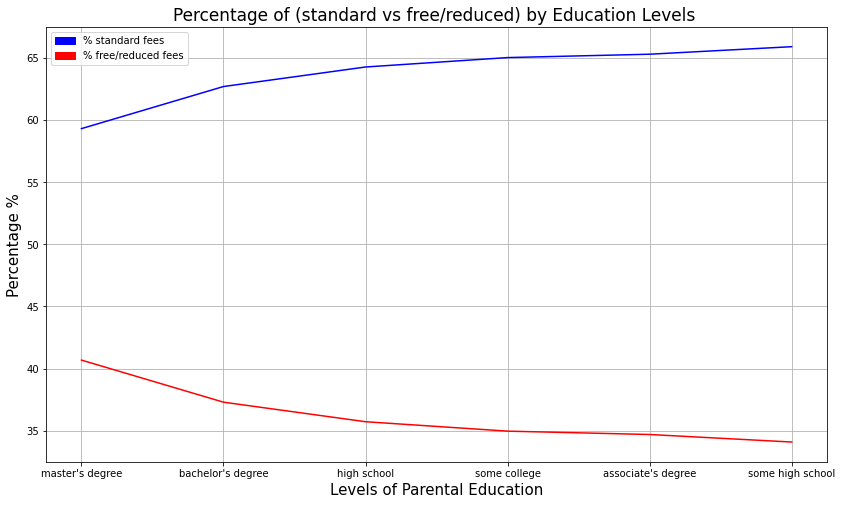

In [15]:
Percentage = Lunch_count[['lunch', 'percentage']].sort_values('percentage')
Percentage

standard = Percentage[Percentage['lunch'] == 'standard']
free_reduced = Percentage[Percentage['lunch'] == 'free/reduced']

fig, axes = plt.subplots(figsize=(14, 8))

colors = {'% standard fees':'Blue', '% free/reduced fees':'Red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
axes.legend(handles, labels)

axes.plot(standard.index.values, standard['percentage'], color = 'Blue')
axes.plot(free_reduced.index.values, free_reduced['percentage'], color = 'Red')
axes.set_xlabel('Levels of Parental Education', fontsize = '15')
axes.set_ylabel('Percentage %', fontsize = '15')
axes.set_title('Percentage of (standard vs free/reduced) by Education Levels ', fontsize = '17')
axes.grid()

With our given information it seems to be __False__ that parents with higher levels of education tend to recieve a lower percentage of free/reduced lunch fees compared to parents with lower levels education. Interestingly enough, by looking at the graph above we see that parents with a master's degree have the smallest gap __( free/reduced: 40.7% | standard: 59.3% )__. As a matter of fact it turns out the child's parents who finished school as far as some high school is the group which recieved the lowest percentage of free/reduced lunch fees __( free/reduced: 34.1%  |  standard	65.9% )__.

Therefore the analysis reveals parental level of education do not factor into whether students receive standard or free/reduced lunch fees. However within the same group in terms of parental level of education, students who pay the standard lunch fees do score higher in their exams. We cannot assume that hierarchy of parental level of education strongly associates with an individual's economical background but we can still say that hierarchy of parental education factor into higher exam scores.

### What else can parents do to improve their student's score? 

### __1. Test Preparation Courses__

One of the most common approach for an academic boost is by taking extra courses instilling the needed material into one's brain. In `students_data` we can look into the `test preparation course` column which lists the students who have completed the test preparation course.

In [16]:
data2 = students_data.groupby(['parental level of education', 'test preparation course']).agg('mean')
data2

math score  \
parental level of education test preparation course               
associate's degree          completed                 71.829268   
                            none                      65.571429   
bachelor's degree           completed                 73.282609   
                            none                      66.902778   
high school                 completed                 65.000000   
                            none                      60.992857   
master's degree             completed                 70.600000   
                            none                      69.307692   
some college                completed                 71.454545   
                            none                      64.892617   
some high school            completed                 66.701299   
                            none                      61.078431   

                                                     reading score  \
parental level of education test preparation course                  
associate's degree          completed                    76.170732   
                            none                         67.857143   
bachelor's degree           completed                    76.739130   
                            none                         70.611111   
high school                 completed                    67.839286   
                            none                         63.450000   
master's degree             completed                    78.250000   
                            none                         73.897436   
some college                completed                    75.987013   
                            none                         66.087248   
some high school            completed                    70.948052   
                            none                         63.911765   

                                                     writing score  \
parental level of education test preparation course                  
associate's degree          completed                    76.817073   
                            none                         65.842857   
bachelor's degree           completed                    78.695652   
                            none                         69.986111   
high school                 completed                    68.053571   
                            none                         60.207143   
master's degree             completed                    80.100000   
                            none                         73.410256   
some college                completed                    76.519481   
                            none                         64.872483   
some high school            completed                    70.363636   
                            none                         60.754902   

                                                     total score  
parental level of education test preparation course               
associate's degree          completed                 224.817073  
                            none                      199.271429  
bachelor's degree           completed                 228.717391  
                            none                      207.500000  
high school                 completed                 200.892857  
                            none                      184.650000  
master's degree             completed                 228.950000  
                            none                      216.615385  
some college                completed                 223.961039  
                            none                      195.852349  
some high school            completed                 208.012987  
                            none                      185.745098

For this project's purposes we will also factor in parental level of education. As we can see above, test scores are without a doubt significantly higher when students have completed the test preparation course. Additionally, among those who completed the preparation course scored higher as the level of parental education is higher as well.

In [17]:
prep = data2.sort_values('total score')
prep.iloc[-4:] # Top 4 results!

,,math score,reading score,writing score,total score
parental level of education,test preparation course,,,,
some college,completed,71.454545,75.987013,76.519481,223.961039
associate's degree,completed,71.829268,76.170732,76.817073,224.817073
bachelor's degree,completed,73.282609,76.739130,78.695652,228.717391
master's degree,completed,70.600000,78.250000,80.100000,228.950000


Students who's parents went to college and have completed the test preparation course recieved the highest test scores in every subject.

Text(0.5, 1.0, "How Test Preparation Courses & Parent's Education affect their child's exam scores")

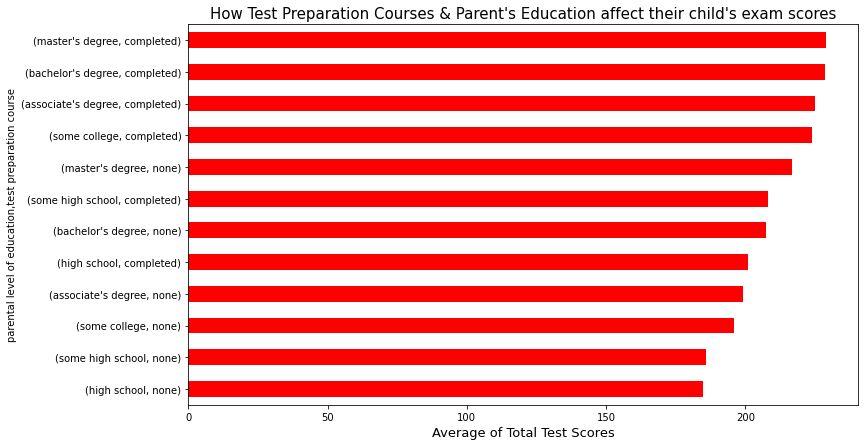

In [18]:
plt.figure(figsize=(12,7))
students_data.groupby(['parental level of education', 
                       'test preparation course']).agg('mean')['total score'].sort_values().plot.barh(color = 'red')
plt.xlabel('Average of Total Test Scores', fontsize = '13')
plt.title("How Test Preparation Courses & Parent's Education affect their child's exam scores", fontsize = 15)

Therefore evidence from the data suggest that test preparation courses are quite effective into improving the student's test scores and additionally parental level of education also plays a factor.

### __2. Acknowledging Strengths and Weaknesses__

Now let's dig a bit deeper! We can further ask which specific subject should a student focus on to achieve the best possible result.

As we can see, only three subjects are being tested: Math, Reading, and Writing. Another way to improve the total exam score is to target the strengths and weaknesses of each individual's academic subjects. Before identifying this, start by asking: Out of the three subjects, which best correlates to possibly the success of another subject?

C:\Users\Yosua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Yosua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


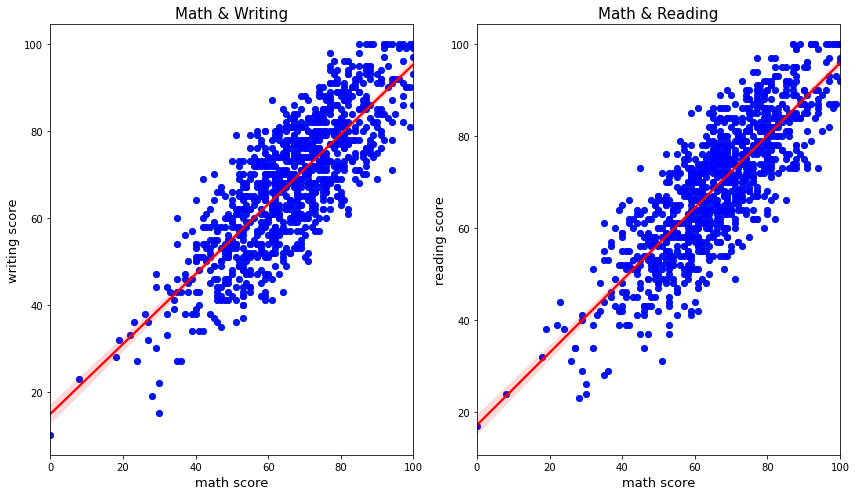

In [19]:
import seaborn as sns

plt.figure(figsize=(12,7))

plt.subplot(1, 2, 1)
plt.scatter(students_data['math score'], students_data['writing score'])
plt.title('Math & Writing', fontsize = 15)
plt.xlabel('Math Scores', fontsize = 13)
plt.ylabel('Writing Scores', fontsize = 13)
sns.regplot(students_data['math score'], students_data['writing score'],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"} )


plt.subplot(1, 2, 2)
plt.scatter(students_data['math score'], students_data['reading score'])
plt.title('Math & Reading', fontsize = 15)
plt.xlabel('Math Scores', fontsize = 13)
plt.ylabel('Reading Scores', fontsize = 13)
sns.regplot(students_data['math score'], students_data['reading score'],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"} )

plt.tight_layout()

As we can see by taking all the math scores and comparing it to the other two subjects, we can visually identify a positive correlation. Students with higher math scores tend to have scored around the same range in reading and writing as well. It also means students who scored low in math also scored low in the other two subjects.  


As an example, we can see in the graphs that the one student who scored a 0/100 in math also did poorly in the other two subjects with a score of less than 20/100.


In [20]:
students_data[students_data['math score'] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
59,female,group C,some high school,free/reduced,none,0,17,10,27


Additionaly from our previous observations, it does not seem to be a coincidence judging from her exam scores that this student receives free/reduced lunch, did not recieve any test preparational courses, and parents not go to college.

Now by comparing reading and writing scores, we can see that these two subjects also have a positive correlation. However, it is important to note that these two subjects are significantly more strongly correlated. 

C:\Users\Yosua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Reading & Writing'}, xlabel='writing score', ylabel='reading score'>

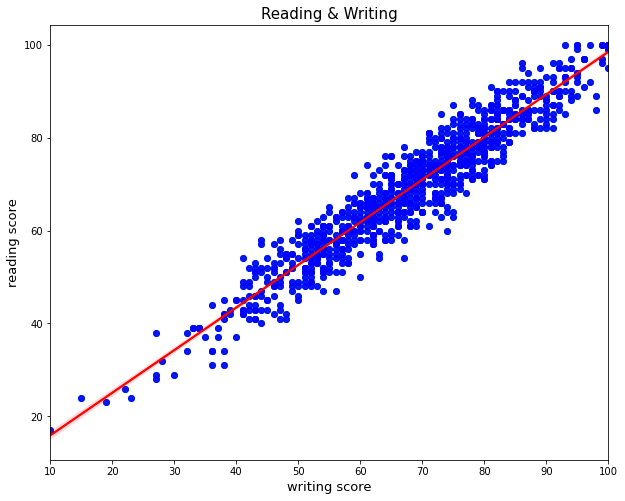

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(students_data['writing score'], students_data['reading score'])
plt.title('Reading & Writing', fontsize = 15)
plt.xlabel('Writing Scores', fontsize = 13)
plt.ylabel('Reading Scores', fontsize = 13)


sns.regplot(students_data['writing score'], students_data['reading score'],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"} )

In the first two graphs let's determine between reading or writing which of the two subjects is more strongly correlated to Math.

In [24]:
correlations = ['math score', 'reading score', 'writing score']
subjects_data = students_data[correlations].corr() 
display(subjects_data)


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


__Correlation values:__
- 1 = a strong positive correlation
- 0 = no correlation
- 1 = strong negative correlation.

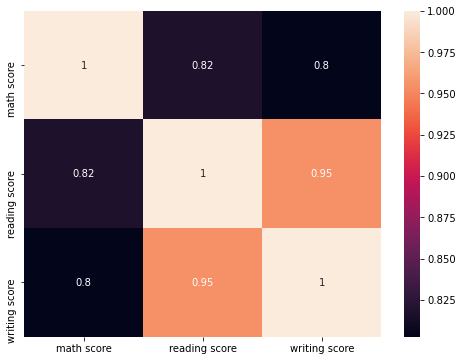

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(subjects_data, annot=True);

Thus, higher reading scores are more strongly correlated to higher math scores compared to writing scores.

Just by visualizing the graph, we can detect that the correlation coefficient (r) is much closer to 1 than the two graphs above. To conclude, students who's strengths are in reading are more comfortable with writing and vice versa compared to math. 

Some suggestions from this analysis:
1. Students who are good at reading or writing should focus more into improving math
2. Students who are good at math should focus more into improving reading or writing
3. Students who are well rounded in all three subjects should focus more into improving reading or writing (math being a third of the weighted total score)

## Conclusion:

The given data includes some interesting information about how a student's personal background can influence their academics. Although this data may not contain much information we were still able to get some insights and answer a few possible questions mainly regards to how parental level of education can affect the exam score of an individual. 

__Questions Answered:__
<br>
Ultimately in this report we have managed to determine:
- Parents with a higher level of educational background links to having their child scoring higher in all three subjects in the exam. 
- Students who pay standard lunch price scored higher but economic factor does not determine whether students receive standard or free/reduced lunch. 
- Test preparation courses are great resources for improving exam scores.
- There is a stronger positive correlation between the two subjects Reading and Writing as compared to Math, opening some suggestions as to which subject should be more focused upon for each unique individual.

__Things to consider:__ Much of the data is unproportional which can affect the accuracy of our results. As an example, less data was inputted for bachelor's and master's degree levels of parental education as compared to the other education levels. As a result, possible answers may have been different assuming the count was evenly inputted.

<br>

__Other possible questions to consider:__
<br>
Noticeably, gender or race/ethnicity were not utilized in our data mainly due to obscure labels given for racial groups. Therefore, even more possible questions can be asked from the given data:
- Which race/ethnic group produced the best exam results?
- Can we learn more about a student's financial background/ parental level of education based off of their race/ethnic groups?
- Which gender is more comfortable with Math? What about Reading? Writing?





__Note:__ This is a fictional dataset taken from Kaggle and in this report strictly utilized for the main purpose of demonstrating data skills using software libraries in python such as pandas and matplotlib. 



## Reference:
https://www.kaggle.com/spscientist/students-performance-in-exams